In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Creating numpy Lists of images

t1_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/ExampleData/*/*t1.nii'))
t2_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/ExampleData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/ExampleData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/ExampleData/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/ExampleData/*/*seg.nii'))

In [ ]:
for img in range(len(t1_list)):
    print("Now preparing image and masks number: ", img)

    temp_image_t1=nib.load(t1_list[img]).get_fdata()
    temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
    temp_image_t1=temp_image_t1[56:184, 56:184, 13:141]
   

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    temp_image_t2=temp_image_t2[56:184, 56:184, 13:141]
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
    temp_image_t1ce=temp_image_t1ce[56:184, 56:184, 13:141]
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    temp_image_flair=temp_image_flair[56:184, 56:184, 13:141]

        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    #print(np.unique(temp_mask))
    
    
    '''combined_images_t1 = np.stack([temp_image_t1], axis=3)
    combined_images_t1=combined_images_t1[56:184, 56:184, 13:141]
    combined_images_t1ce = np.stack([temp_image_t1ce], axis=3)
    combined_images_t1ce=combined_images_t1ce[56:184, 56:184, 13:141]
    combined_images_t2 = np.stack([temp_image_t2], axis=3)
    combined_images_t2=combined_images_t2[56:184, 56:184, 13:141]
    combined_images_flair = np.stack([temp_image_flair], axis=3)
    combined_images_flair=combined_images_flair[56:184, 56:184, 13:141]'''
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_mask= to_categorical(temp_mask, num_classes=4)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np/image_'+str(img)+'.npy', temp_image_t1)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1ce_np/image'+str(img)+'.npy', temp_image_t1ce)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_np/image_'+str(img)+'.npy', temp_image_t2)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/flair_np/image_'+str(img)+'.npy', temp_image_flair)
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/mask_np/mask_'+str(img)+'.npy', temp_mask) 
   
     

In [ ]:
for img in range(len(t1_list)):
    print("Now preparing image and masks number: ", img)

        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    print(np.unique(temp_mask))

    #temp_mask= to_categorical(temp_mask, num_classes=4)
   
    np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/mask_np/mask_'+str(img)+'.npy', temp_mask) 
   
     

In [ ]:
import numpy as np
t1_image_list = []
t1_image_list = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np/image_0.npy')
for i in range(1, 20):
  my_img=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np/image_'+str(i)+'.npy')
  t1_image_list.append(my_img, axis = 3)

t1_image_list.shape

In [ ]:
import os
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from skimage.io import imread,imshow
from skimage.transform import resize
import os


#################################
IMG_ROW=IMG_COL=128
IMG_CHANNEL=3
IMG_ROW=IMG_COL=64
IMG_CHANNEL=3
TRAIN_IMG_DIR="/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np/"

imgarray=[]
maskarray=[]

list_1=os.listdir(TRAIN_IMG_DIR)


import os  
for path in list_1:
    #print(i)
    
    print("done",path)
        #extension = os.path.splitext(path)[0]
        #extension=extension+'.png'
    img=np.load(TRAIN_IMG_DIR+path)
        
        #img,mask=get_img_mask_array(TRAIN_IMG_DIR+path,TRAIN_MASK_DIR)
    imgarray.append(img)
        #maskarray.append(mask)
    print(np.asarray(imgarray).shape)
        #print(np.asarray(imgarray).shape)
    #print(np.asarray(maskarray).shape)
imgarray=np.asarray(imgarray)
np.save(r'/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np\t1ce.npy', imgarray)

In [ ]:
t2_image = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_mask/t2_np/image_0.npy')
for i in range(1, 20):
  my_img=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_mask/t2_np/image_'+str(i)+'.npy')
  t2_image = np.stack([my_img], axis = 3)

t2_image.dtype

dtype('float64')

In [ ]:
t1ce_image = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1ce/image_0.npy')
for i in range(1, 20):
  my_img=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1ce_np/image_'+str(i)+'.npy')
  t1ce_image = np.stack([my_img], axis = 3)



In [ ]:
flair_image = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/flair_np/image_0.npy')
for i in range(1, 20):
  my_img=np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/flair_np/image_'+str(i)+'.npy')
  flair_image = np.stack([my_img], axis = 3)

In [ ]:
import numpy as np
mask = np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_mask/mask_np/mask_0.npy')
for i in range(1, 20):
  my_mask =np.load('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_mask/mask_np/mask_'+str(i)+'.npy')
  mask = np.stack([my_mask], axis = 3)

mask.dtype

dtype('uint8')

In [ ]:
np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t1_np', t1_image)
np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_np/', t2_image)
#np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/t2_np/image_'+str(img)+'.npy', temp_image_t2)
np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/flair_np/', flair_image)
np.save('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/mask_np/', mask) 
   

In [ ]:
import random
n_slice=random.randint(0, t1_image.shape[2])
plt.subplot(211)
plt.imshow(t1_image[:, :, n_slice, 0], cmap='gray')
plt.title('Image t1')

plt.subplot(212)
plt.imshow(mask[:,:,n_slice, 0])
plt.title('Mask')
plt.show()

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

input_folder = '/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/t2/'
output_folder = '/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None) # default values

Copying files: 420 files [07:40,  1.10s/ files]


In [ ]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

############################################


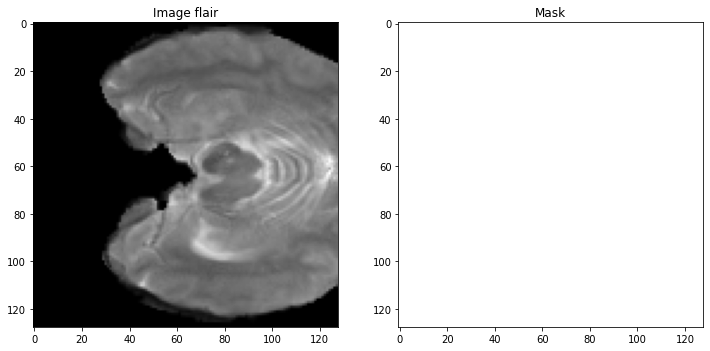

In [ ]:
from matplotlib import pyplot as plt
import random

train_img_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/train/images/"
train_mask_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
#test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(test_img[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(122)
plt.imshow(test_mask[:, : , n_slice])
plt.title('Mask')
plt.show()

In [ ]:
!pip install keras_applications
!pip install classification-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

In [ ]:
import numpy as np


########################
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape
from keras.layers import BatchNormalization
import tensorflow as tf
from torch.nn import MaxUnpool3d
from keras.layers import Conv3D, MaxPooling3D, concatenate, UpSampling3D


def segnet(
        input_shape,
        n_labels,
        kernel=3,
        pool_size=(2, 2, 2),
        output_mode="softmax"):
    # encoder
    inputs = Input(shape=input_shape)

    conv_1 = Conv3D(64, (kernel, kernel, kernel), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_2 = Conv3D(64, (kernel, kernel, kernel), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)

    pool_1= MaxPooling3D(pool_size)(conv_2)

    conv_3 = Conv3D(128, (kernel, kernel, kernel), padding="same")(pool_1)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_4 = Conv3D(128, (kernel, kernel, kernel), padding="same")(conv_3)
    conv_4 = BatchNormalization()(conv_4)
    conv_4 = Activation("relu")(conv_4)

    pool_2 = MaxPooling3D(pool_size)(conv_4)

    conv_5 = Conv3D(256, (kernel, kernel, kernel), padding="same")(pool_2)
    conv_5 = BatchNormalization()(conv_5)
    conv_5 = Activation("relu")(conv_5)
    conv_6 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_5)
    conv_6 = BatchNormalization()(conv_6)
    conv_6 = Activation("relu")(conv_6)
    conv_7 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_6)
    conv_7 = BatchNormalization()(conv_7)
    conv_7 = Activation("relu")(conv_7)

    pool_3 = MaxPooling3D(pool_size)(conv_7)

    conv_8 = Conv3D(512, (kernel, kernel, kernel), padding="same")(pool_3)
    conv_8 = BatchNormalization()(conv_8)
    conv_8 = Activation("relu")(conv_8)
    conv_9 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_8)
    conv_9 = BatchNormalization()(conv_9)
    conv_9 = Activation("relu")(conv_9)
    conv_10 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_9)
    conv_10 = BatchNormalization()(conv_10)
    conv_10 = Activation("relu")(conv_10)

    pool_4 = MaxPooling3D(pool_size)(conv_10)

    conv_11 = Conv3D(512, (kernel, kernel, kernel), padding="same")(pool_4)
    conv_11 = BatchNormalization()(conv_11)
    conv_11 = Activation("relu")(conv_11)
    conv_12 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_11)
    conv_12 = BatchNormalization()(conv_12)
    conv_12 = Activation("relu")(conv_12)
    conv_13 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_12)
    conv_13 = BatchNormalization()(conv_13)
    conv_13 = Activation("relu")(conv_13)

    pool_5 = MaxPooling3D(pool_size)(conv_13)
    print("Build enceder done..")

    # decoder

    unpool_1 = UpSampling3D(pool_size)(pool_5)

    conv_14 = Conv3D(512, (kernel, kernel, kernel), padding="same")(unpool_1)
    conv_14 = BatchNormalization()(conv_14)
    conv_14 = Activation("relu")(conv_14)
    conv_15 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_14)
    conv_15 = BatchNormalization()(conv_15)
    conv_15 = Activation("relu")(conv_15)
    conv_16 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_15)
    conv_16 = BatchNormalization()(conv_16)
    conv_16 = Activation("relu")(conv_16)

    unpool_2 = UpSampling3D(pool_size)(conv_16)

    conv_17 = Conv3D(512, (kernel, kernel, kernel), padding="same")(unpool_2)
    conv_17 = BatchNormalization()(conv_17)
    conv_17 = Activation("relu")(conv_17)
    conv_18 = Conv3D(512, (kernel, kernel, kernel), padding="same")(conv_17)
    conv_18 = BatchNormalization()(conv_18)
    conv_18 = Activation("relu")(conv_18)
    conv_19 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_18)
    conv_19 = BatchNormalization()(conv_19)
    conv_19 = Activation("relu")(conv_19)

    unpool_3 = UpSampling3D(pool_size)(conv_19)

    conv_20 = Conv3D(256, (kernel, kernel, kernel), padding="same")(unpool_3)
    conv_20 = BatchNormalization()(conv_20)
    conv_20 = Activation("relu")(conv_20)
    conv_21 = Conv3D(256, (kernel, kernel, kernel), padding="same")(conv_20)
    conv_21 = BatchNormalization()(conv_21)
    conv_21 = Activation("relu")(conv_21)
    conv_22 = Conv3D(128, (kernel, kernel, kernel), padding="same")(conv_21)
    conv_22 = BatchNormalization()(conv_22)
    conv_22 = Activation("relu")(conv_22)

    unpool_4 = UpSampling3D(pool_size)(conv_22)

    conv_23 = Conv3D(128, (kernel, kernel, kernel), padding="same")(unpool_4)
    conv_23 = BatchNormalization()(conv_23)
    conv_23 = Activation("relu")(conv_23)
    conv_24 = Conv3D(64, (kernel, kernel, kernel), padding="same")(conv_23)
    conv_24 = BatchNormalization()(conv_24)
    conv_24 = Activation("relu")(conv_24)

    unpool_5 = UpSampling3D(pool_size)(conv_24)

    conv_25 = Conv3D(64, (kernel, kernel, kernel), padding="same")(unpool_5)
    conv_25 = BatchNormalization()(conv_25)
    conv_25 = Activation("relu")(conv_25)

    conv_26 = Conv3D(n_labels, (1, 1, 1), padding="valid")(conv_25)
    conv_26 = BatchNormalization()(conv_26)
    '''conv_26 = Reshape(
            (input_shape[0]*input_shape[1], n_labels),
            input_shape=(input_shape[0], input_shape[1], n_labels))(conv_26)'''

    outputs = Activation(output_mode)(conv_26)
    print("Build decoder done..")

    model = Model(inputs=inputs, outputs=outputs, name="SegNet")

    return model



model = segnet(input_shape=(128,128,128,1), n_labels=4)

model.summary()
print(model.input_shape)
print(model.output_shape)

Build enceder done..
Build decoder done..
Model: "SegNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 128, 1) 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 128, 128, 128, 64) 1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128, 64) 256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128, 64) 0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 128, 128, 128, 64) 110656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128, 64) 256       
_________________________________________________________________
activation_1 (Acti

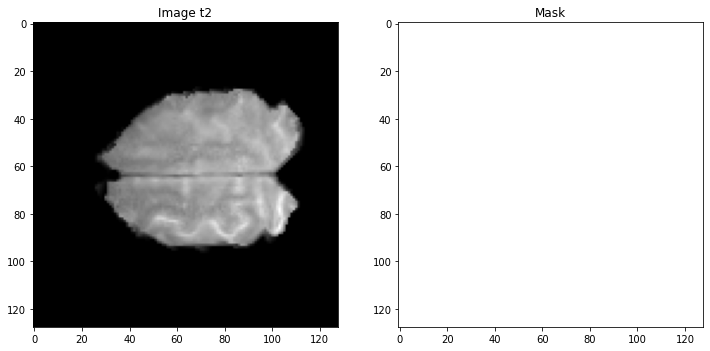

In [ ]:
# https://youtu.be/ScdCQqLtnis
"""
@author: Sreenivas Bhattiprolu
Code to train batches of cropped BraTS 2020 images using 3D U-net.
Please get the data ready and define custom data gnerator using the other
files in this directory.
Images are expected to be 128x128x128x3 npy data (3 corresponds to the 3 channels for 
                                                  test_image_flair, test_image_t1ce, test_image_t2)
Change the U-net input shape based on your input dataset shape (e.g. if you decide to only se 2 channels or all 4 channels)
Masks are expected to be 128x128x128x3 npy data (4 corresponds to the 4 classes / labels)
You can change input image sizes to customize for your computing resources.
"""


import os
import numpy as np
#from custom_datagen import imageLoader
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



##################################################

batch_size = 2
#############################################################
#Optional step of finding the distribution of each class and calculating appropriate weights
#Alternatively you can just assign equal weights and see how well the model performs: 0.25, 0.25, 0.25, 0.25

'''import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('BraTS2020_TrainingData/input_data_128/train/masks/*.npy'))
for img in range(len(train_mask_list)):
    print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4
#Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

#Weights are: 0.26, 22.53, 22.53, 26.21
#wt0, wt1, wt2, wt3 = 0.26, 22.53, 22.53, 26.21
#These weihts can be used for Dice loss 
'''
##############################################################
#Define the image generators for training and validation

train_img_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/train/images/"
train_mask_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)


val_img_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/val/images/"
val_mask_dir = "/content/drive/MyDrive/brain tumor segmentation/huzaifa data/example data/Origna_data_handling/DataSplit8020/val/masks"
val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
##################################

########################################################################
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
#test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(test_img[:,:,n_slice], cmap='gray')
plt.title('Image t2')

plt.subplot(122)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()




In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 3.2 MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
!pip install keras_applications
!pip install classification-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

In [ ]:
###########################################################################
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)
#######################################################################
#Fit the model 

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


model = segnet(
       (128,128,128,1),
        4)
    # encoder

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=2,
          )

#model.save('brats_3d.hdf5')
##################################################################




Build enceder done..
Build decoder done..
Model: "SegNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 128, 1) 0         
_________________________________________________________________
conv3d_52 (Conv3D)           (None, 128, 128, 128, 64) 1792      
_________________________________________________________________
batch_normalization_52 (Batc (None, 128, 128, 128, 64) 256       
_________________________________________________________________
activation_52 (Activation)   (None, 128, 128, 128, 64) 0         
_________________________________________________________________
conv3d_53 (Conv3D)           (None, 128, 128, 128, 64) 110656    
_________________________________________________________________
batch_normalization_53 (Batc (None, 128, 128, 128, 64) 256       
_________________________________________________________________
activation_53 (Act

ResourceExhaustedError: ignored

In [ ]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################
from keras.models import load_model

#Load model for prediction or continue training

#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and 
#continue training we need to provide these as custom_objects.
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5')

#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#Now all set to continue the training process. 
history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=1,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )
#################################################

#For predictions you do not need to compile the model, so ...
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5', 
                      compile=False)


#Verify IoU on a batch of images from the test dataset
#Using built in keras function for IoU
#Only works on TF > 2.0
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

#############################################
#Predict on a few test images, one at a time
#Try images: 
img_num = 82

test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

############################################################